<a href="https://colab.research.google.com/github/saubhagyav/Hotel_Bookings_analysis/blob/main/Saubhagya_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Alma Better/Python for data science/capstone - Hotel Booking Analysis/Copy of Hotel Bookings.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Target Variable - Cancellations (column- is_canceled)

#**Ques1:** What is the level of correlation between "is_canceled" variable and other variables of the Dataframe ?

**Firstly we are doing correlation analysis to understand the level of correlation of other int/float variables with cancellation.**

In [ ]:
df.

In [8]:
# Taking out all the variables from the dataframe to check for their correlation with is_canceled


df_cor = pd.DataFrame(df.loc[:, ['is_canceled', 'lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',\
                                 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'total_of_special_requests',\
                                 'adr','stays_in_weekend_nights', 'required_car_parking_spaces' ]])



In [9]:
corrMatrix = df_cor.corr()

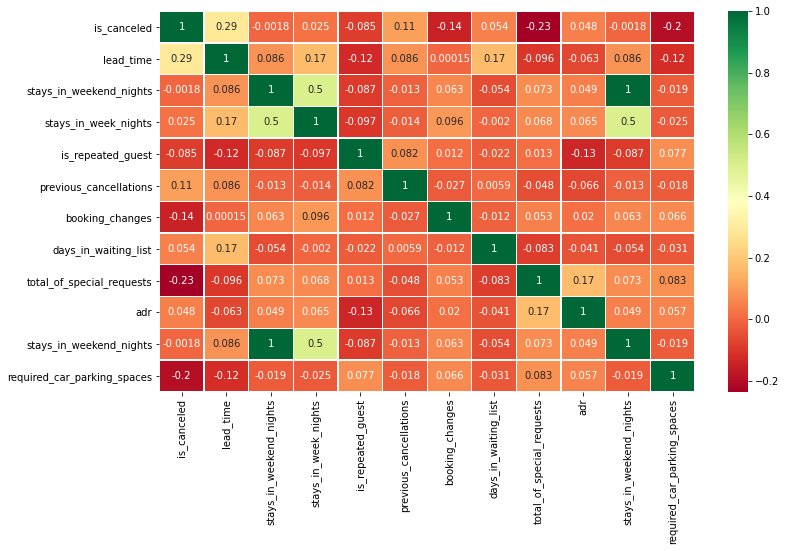

In [10]:
# so we can clearly observe that there is not any significant correlation between the variables.
fig, ax = plt.subplots(figsize = (12, 7))


sns.heatmap(corrMatrix, cmap ='RdYlGn', linewidths = 0.30, annot=True )
plt.show()

# Upon Observing the above heat map, we observe the following things:- 

1) lead_time is the only variable that has some significant level of positive correlation with is_cancelled feature


2) Most of the variables have insignificant level of correlation with the is_cancelled feature. 


3) Total_of_special_requests and required_car_parking_spaces have significant level of negative correlation with is_cancelled feature.

# **Conclusion -**

1) We can deduce that as lead time increases the chances of cancellation also rises. In other words, lead time and cancellation are directly proportional with each other.


2) We can also deduce that as number of special requests and car parking space increase, the chances of cancellation reduces. In other words, number of special requests and car parking space are inversely proportional with cancellation feature.



#**Ques2:** What are the percentage of cancellations in hotels? Which Hotel has the highest percentage of cancellations?

# Now let us look at the number of bookings and cancellations that took place in both the hotels, namely resort hotel and city hotel

In [18]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

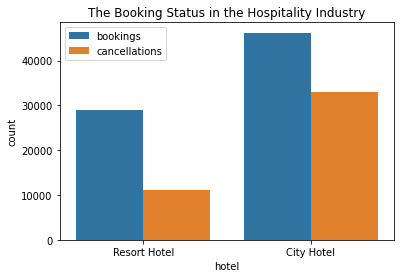

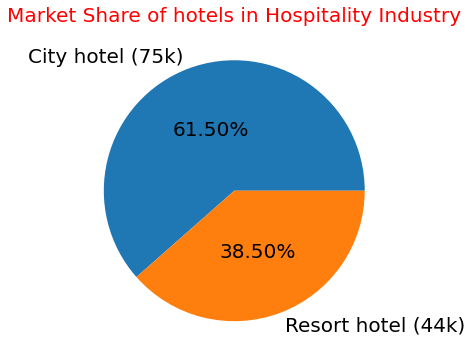

In [19]:
# here the successful bookings are represented by 0 and cancellations are represented by 1.

b_ch = sns.countplot(data=df, x='hotel', hue='is_canceled')
b_ch.legend(['bookings','cancellations'])
b_ch.set(title='The Booking Status in the Hospitality Industry')
# we can clearly observe that the number of cancellations are quite large in City Hotel as compared to Resort Hotel.


# Now let us look at the market share of both the hotels.
df_hotel = df[df['is_canceled']==0]['hotel']
plt.figure(figsize=((6,6)))
plt.title(label='Market Share of hotels in Hospitality Industry',fontsize=20, color='red')
plt.pie(df_hotel.value_counts(), labels=['City hotel (75k)', 'Resort hotel (44k)'], autopct='%2.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()


In [ ]:
# Bookings and cancellation count in Resort Hotel

df[df['hotel']== 'Resort Hotel'].is_canceled.value_counts()

0    28938
1    11122
Name: is_canceled, dtype: int64

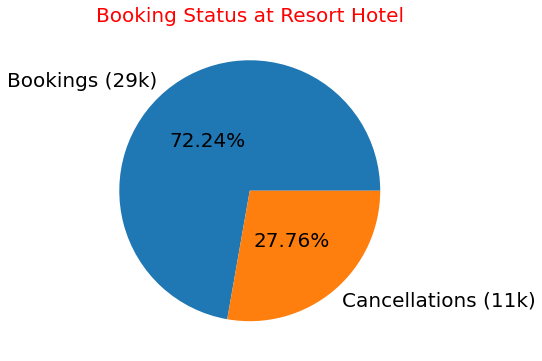

In [16]:
# Resort Hotel Pie chart

df_resort_hotel = pd.DataFrame(df[df['hotel']== 'Resort Hotel'])
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status at Resort Hotel',fontsize=20, color='red')
plt.pie(df_resort_hotel.is_canceled.value_counts(), labels=['Bookings (29k)','Cancellations (11k)'], autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

In [ ]:
# Bookings and cancellation count in City Hotel
df[df['hotel']== 'City Hotel'].is_canceled.value_counts()

0    46228
1    33102
Name: is_canceled, dtype: int64

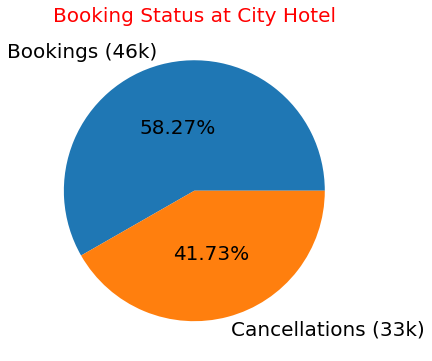

In [15]:
# City Hotel Pie chart

df_resort_hotel = pd.DataFrame(df[df['hotel']== 'City Hotel'])
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status at City Hotel',fontsize=20, color='red')
plt.pie(df_resort_hotel.is_canceled.value_counts(), labels=['Bookings (46k)','Cancellations (33k)'], autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

# **Conclusion 2 -**

From the above analysis we can conclude:

1) The Booking percentage of City Hotel (66.45%) is almost twice the pecentage of bookings in Resort Hotel(33.55%).

2) The Cancellation percentage of City Hotel are quite large(41.73%) as compared to the Resort Hotel Cancellations(27.76%), approximately half the bookings of City Hotel are cancelled.



#**Ques3:** Does Early Bookings with high lead time results in more cancellations by customers ?

In [ ]:
# First we will change the name of the column and replace the 0 and 1 values with string values.

df_new = df.rename(columns={'is_canceled':'Booking_Status'})
df_new['Booking_Status'].replace([0,1],['Booked', 'Cancellations'], inplace=True)


In [ ]:
df_new.head(3)

,hotel,Booking_Status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Booked,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,Booked,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,Booked,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


# The Booking and Cancellation patterns are quite same for both the hotels

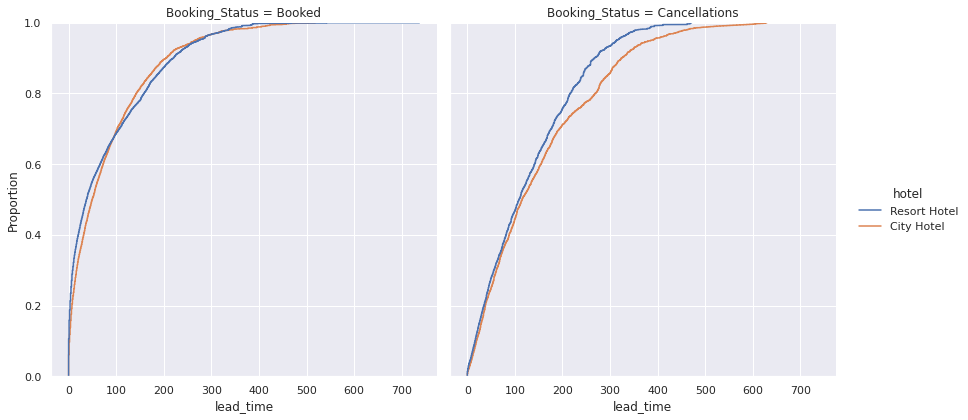

In [ ]:
sns.set(font_scale=1)

sns.displot(df_new, x="lead_time", col="Booking_Status", hue="hotel",height=6, kind="ecdf")

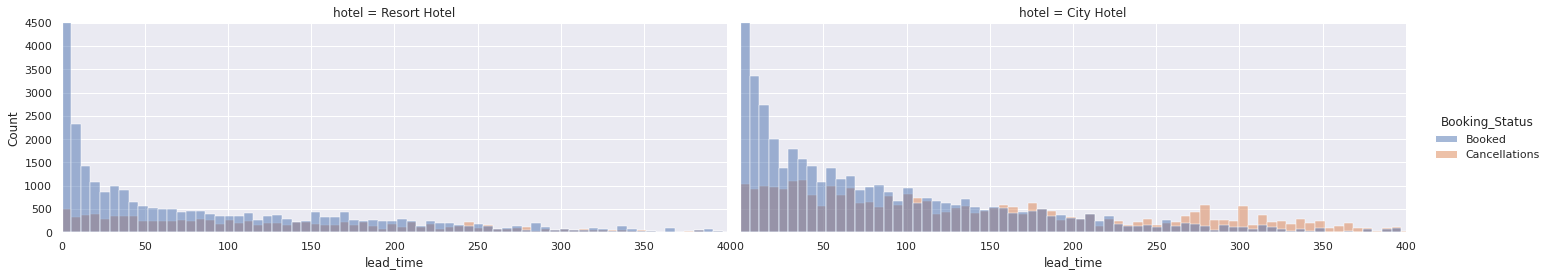

In [ ]:
y = sns.set(font_scale=1)

y = sns.displot(df_new, x="lead_time", col="hotel", hue="Booking_Status", height=4, aspect=2.5 )

y.set(xlim=(0, 400))
y.set(ylim=(0, 4500))


# From the Above displot we can infer the following things:-

1) As the lead time increase the proportion of cancellations with respect to the total bookings becomes higher.

2) It is visible that for both the hotels when the lead time is above 50 days, the chances of the bookings getting cancelled is more than 50%. 

# Conclusion -

We can conclude that as the lead time increase the probabilty of bookings getting canceled rises. Around the lead time of 150 days, the probability of booking getting canceled is more than the probability of customer staying at the hotel.



# **Assumption 1 - The cancellation rate must be higher incase the customer didn't get the room for which they reserved.**

**Forming another Variable Total_stay just to calculate the number of nights the customer stays in the hotel.**

In [ ]:
df_assign = df_new[df_new['reserved_room_type'] != df_new['assigned_room_type']]

df_assign.drop(columns=['lead_time',	'arrival_date_year',	'arrival_date_month',	'arrival_date_week_number',\
                        'arrival_date_day_of_month',	'stays_in_weekend_nights','stays_in_week_nights',	'adults',\
                        'children',	'babies',	'meal',	'country',	'market_segment','distribution_channel',\
                        'is_repeated_guest',	'previous_cancellations',	'previous_bookings_not_canceled'])



,hotel,Booking_Status,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,Booked,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
12,Resort Hotel,Booked,D,E,0,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05
15,Resort Hotel,Booked,D,E,0,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05
17,Resort Hotel,Booked,A,E,0,No Deposit,240.0,NaN,0,Transient,88.20,0,0,Check-Out,2015-07-02
18,Resort Hotel,Booked,A,G,0,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119273,City Hotel,Booked,A,K,1,No Deposit,19.0,NaN,0,Transient-Party,104.00,0,0,Check-Out,2017-09-01
119274,City Hotel,Booked,A,K,2,No Deposit,19.0,NaN,0,Transient-Party,104.00,0,0,Check-Out,2017-09-01
119289,City Hotel,Booked,E,F,1,No Deposit,9.0,NaN,0,Transient,236.33,0,3,Check-Out,2017-09-02
119297,City Hotel,Booked,D,F,4,No Deposit,9.0,NaN,0,Transient,170.80,0,2,Check-Out,2017-09-02


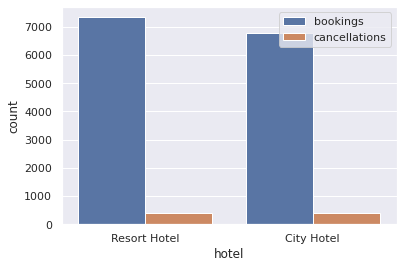

In [ ]:
b_ch = sns.countplot(data=df_assign, x='hotel', hue='Booking_Status')
b_ch.legend(['bookings','cancellations'])

In [ ]:
df_assign.Booking_Status.value_counts()

Booked           14115
Cancellations      802
Name: Booking_Status, dtype: int64

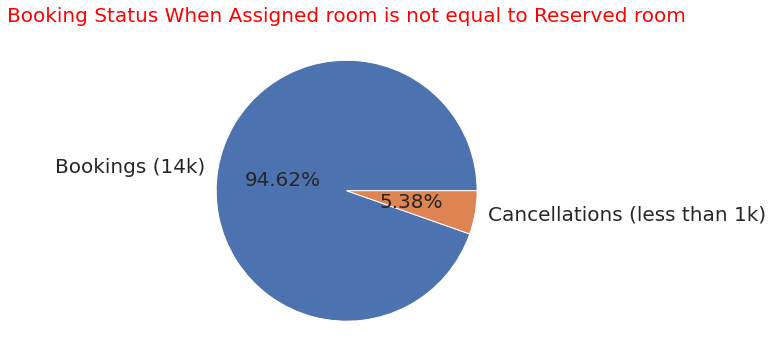

In [ ]:
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status When Assigned room is not equal to Reserved room',fontsize=20, color='red')
plt.pie(df_assign.Booking_Status.value_counts(), labels=['Bookings (14k)','Cancellations (less than 1k)'], autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

In [ ]:
df_assign1 = df_new[df_new['reserved_room_type'] == df_new['assigned_room_type']]

df_assign.drop(columns=['lead_time',	'arrival_date_year',	'arrival_date_month',	'arrival_date_week_number',\
                        'arrival_date_day_of_month',	'stays_in_weekend_nights','stays_in_week_nights',	'adults',\
                        'children',	'babies',	'meal',	'country',	'market_segment','distribution_channel',\
                        'is_repeated_guest',	'previous_cancellations',	'previous_bookings_not_canceled'])


,hotel,Booking_Status,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,Booked,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
12,Resort Hotel,Booked,D,E,0,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05
15,Resort Hotel,Booked,D,E,0,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05
17,Resort Hotel,Booked,A,E,0,No Deposit,240.0,NaN,0,Transient,88.20,0,0,Check-Out,2015-07-02
18,Resort Hotel,Booked,A,G,0,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119273,City Hotel,Booked,A,K,1,No Deposit,19.0,NaN,0,Transient-Party,104.00,0,0,Check-Out,2017-09-01
119274,City Hotel,Booked,A,K,2,No Deposit,19.0,NaN,0,Transient-Party,104.00,0,0,Check-Out,2017-09-01
119289,City Hotel,Booked,E,F,1,No Deposit,9.0,NaN,0,Transient,236.33,0,3,Check-Out,2017-09-02
119297,City Hotel,Booked,D,F,4,No Deposit,9.0,NaN,0,Transient,170.80,0,2,Check-Out,2017-09-02


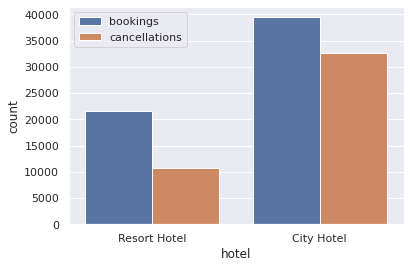

In [ ]:
b_ch = sns.countplot(data=df_assign1, x='hotel', hue='Booking_Status')
b_ch.legend(['bookings','cancellations'])

In [ ]:
df_assign1.Booking_Status.value_counts()

Booked           61051
Cancellations    43422
Name: Booking_Status, dtype: int64

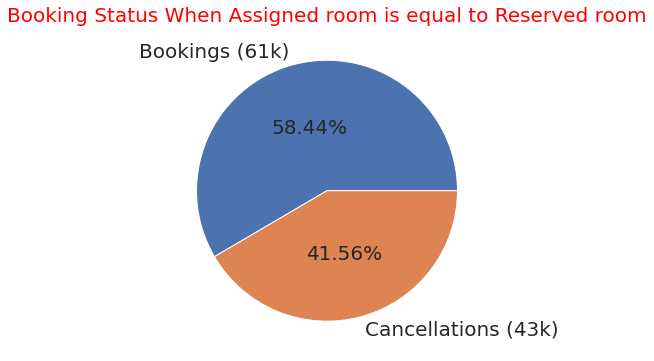

In [ ]:
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status When Assigned room is equal to Reserved room',fontsize=20, color='red')
plt.pie(df_assign1.Booking_Status.value_counts(), labels=['Bookings (61k)','Cancellations (43k)'], autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

# Conclusion - 
**Thus our assumption is wrong, cancellation rates do not depend upon whether the customer could get the room that he reserved for while booking.**

# **Assumption 2 - There is more cancellation among new customers as compared to repeated customers.**

In [ ]:
df_new2 = df_new.rename(columns={'is_repeated_guest':'Type_of_customer'})
df_new2['Type_of_customer'].replace([0,1],['New Customer', 'Repeated customer'], inplace=True)

In [ ]:
df_new2 = df_new2.loc[:, ['hotel', 'Booking_Status', 'Type_of_customer', 'arrival_date_month']]
df_new2

,hotel,Booking_Status,Type_of_customer,arrival_date_month
0,Resort Hotel,Booked,New Customer,July
1,Resort Hotel,Booked,New Customer,July
2,Resort Hotel,Booked,New Customer,July
3,Resort Hotel,Booked,New Customer,July
4,Resort Hotel,Booked,New Customer,July
...,...,...,...,...
119385,City Hotel,Booked,New Customer,August
119386,City Hotel,Booked,New Customer,August
119387,City Hotel,Booked,New Customer,August
119388,City Hotel,Booked,New Customer,August


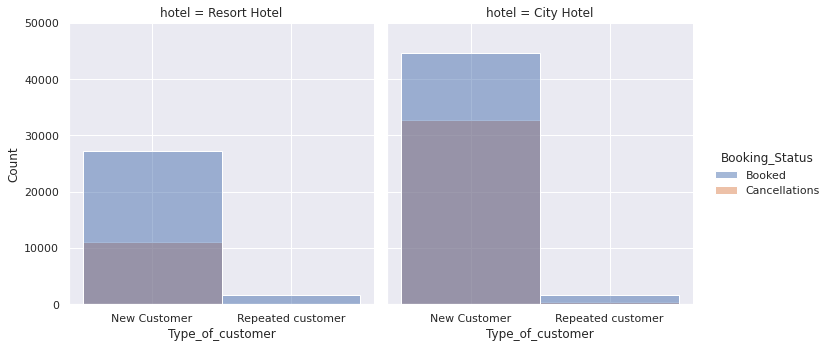

In [ ]:
y = sns.set(font_scale=1)

y = sns.displot(df_new2, x="Type_of_customer", col="hotel", hue="Booking_Status", height=5, aspect=1 )

y.set(ylim=(0, 50000))

# Conclusion- 

**Our Assumption was correct there is large number of cancellations from new customers as compared to repeated customers.**

# Asssumption 3- The cancellation rates are concentrated only on some particular months of the year.

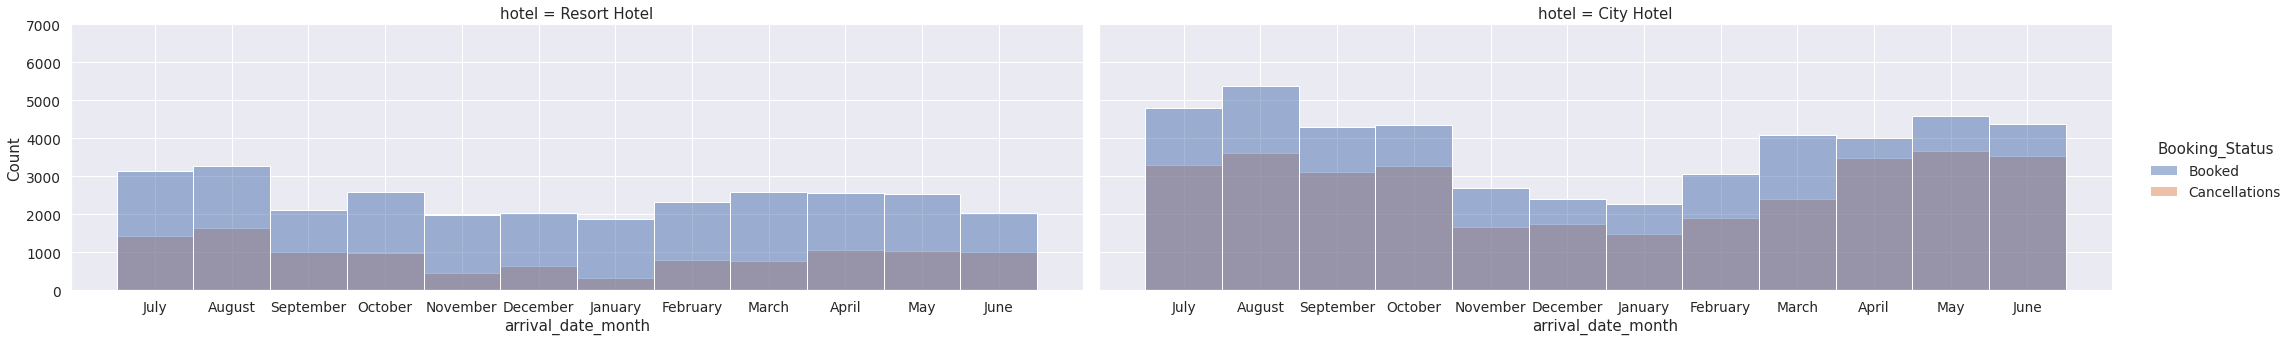

In [ ]:
y = sns.set(font_scale=1.25)

y = sns.displot(df_new2, x="arrival_date_month", col="hotel", hue="Booking_Status", height=5, aspect=3 )

y.set(ylim=(0, 7000))

# Conclusion - 

**We can clearly see that the cancellation happens in all the months of the year and we can't see any huge concentration of cancellations in any particular months for both the hotels.**

# Upon analysing the Above Diagrams I have come up with the following insights:-

1)

In [ ]:
df_staycount = df['Total_stay'].value_counts()

2     27643
3     27076
1     21020
4     17383
7      8655
5      7784
6      3857
8      1161
10     1139
14      916
9       841
0       715
11      396
12      223
13      142
15       75
21       71
16       40
25       37
28       35
18       35
19       22
17       20
22       14
29       14
20       14
30       13
23        8
26        6
24        6
27        5
35        5
42        4
33        3
56        2
57        1
34        1
38        1
43        1
69        1
45        1
46        1
48        1
49        1
60        1
Name: Total_stay, dtype: int64

In [ ]:
# Dropping some columns that we won't be using for our analysis

df_a = df.drop(columns= ['agent', 'company', 'adults'])

In [ ]:
# Let's just look at how many bookings were made in City Hotel and Resort Hotel

df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
# Now we have got the bookings that were not cancelled 

df.hotel[df['is_canceled']== 0].value_counts()

City Hotel      46228
Resort Hotel    28938
Name: hotel, dtype: int64

In [ ]:
# Now we have got the bookings that were cancelled 

df.hotel[df['is_canceled']!= 0].value_counts()

City Hotel      33102
Resort Hotel    11122
Name: hotel, dtype: int64

In [ ]:
# mean adr of all the distribution channels

df_a.groupby('distribution_channel').agg({'adr': 'mean'}).sort_values(by='adr',ascending=False)

,adr
distribution_channel,
GDS,120.554301
Direct,106.654983
TA/TO,103.292866
Corporate,69.325204
Undefined,46.240000


In [ ]:
# sum of adr of all the bookings made using different distribution channels including cancellation bookings

df_a.groupby('distribution_channel').agg({'adr': 'sum'}).sort_values(by='adr',ascending=False)

,adr
distribution_channel,
TA/TO,10109272.81
Direct,1561962.22
Corporate,462884.39
GDS,23266.98
Undefined,231.20


In [ ]:
# sum of adr of all the bookings made using different distribution channels excluding cancellation bookings

df_a[df_a['is_canceled'] != 1].groupby('distribution_channel').agg({'adr': 'sum'}).sort_values(by='adr',ascending=False)

,adr
distribution_channel,
TA/TO,5865166.66
Direct,1281794.70
Corporate,349891.25
GDS,18709.62
Undefined,112.70


In [ ]:
df_count = df[df['is_canceled'] == 1].groupby(['country','hotel']).agg({'hotel': 'count'})
df_count

NameError: ignored

In [ ]:
# Grouping Country and hotel on bookings excluding cancelled bookings to calculate the booking count as per country

df_count = df_a[df_a['is_canceled'] != 1].groupby(['country','hotel']).agg({'hotel': 'count'})
df_count

hotel
country hotel              
ABW     City Hotel        2
AGO     City Hotel      140
        Resort Hotel     17
AIA     City Hotel        1
ALB     City Hotel        8
...                     ...
VNM     Resort Hotel      2
ZAF     City Hotel       36
        Resort Hotel     13
ZMB     Resort Hotel      1
ZWE     Resort Hotel      2

[268 rows x 1 columns]

In [ ]:
# using rename and sort to come up with a final Dataframe containing top countries from where bookings come from.


df_count.rename(columns={'hotel': 'no_of_bookings'},inplace=True)
df_count.sort_values(by='no_of_bookings', ascending=False).head(20)

no_of_bookings
country hotel                       
PRT     City Hotel             10879
        Resort Hotel           10192
FRA     City Hotel              7081
GBR     Resort Hotel            5923
DEU     City Hotel              5012
GBR     City Hotel              3753
ESP     City Hotel              3285
        Resort Hotel            3106
ITA     City Hotel              2054
IRL     Resort Hotel            1734
BEL     City Hotel              1479
FRA     Resort Hotel            1400
NLD     City Hotel              1259
USA     City Hotel              1189
BRA     City Hotel              1065
DEU     Resort Hotel            1057
CHE     City Hotel               979
AUT     City Hotel               857
IRL     City Hotel               809
CN      Resort Hotel             614

In [ ]:
# Finding the stats of lead time when bookings are not cancelled

df_b1 = pd.DataFrame(df_a[df_a['is_canceled'] !=1 ][['lead_time','is_canceled']])
df_b1.groupby('is_canceled')['lead_time'].describe()

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,75166.0,79.984687,91.109888,0.0,9.0,45.0,124.0,737.0


In [ ]:
# Finding the stats of lead time when bookings are cancelled

df_b2 = pd.DataFrame(df_a[df_a['is_canceled'] ==1 ][['lead_time','is_canceled']])
df_b2.groupby('is_canceled')['lead_time'].describe()

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
1,44224.0,144.848815,118.624829,0.0,48.0,113.0,214.0,629.0


In [ ]:
df_c = df_a[['hotel','arrival_date_month']]
df_c

,hotel,arrival_date_month
0,Resort Hotel,July
1,Resort Hotel,July
2,Resort Hotel,July
3,Resort Hotel,July
4,Resort Hotel,July
...,...,...
119385,City Hotel,August
119386,City Hotel,August
119387,City Hotel,August
119388,City Hotel,August


In [ ]:
# Calculating the total number of bookings made in the two hotels based on months

df_d = pd.DataFrame(df_c.groupby('arrival_date_month')['hotel'].value_counts())
df_d.rename(columns={'hotel':'no_of_bookings'}, inplace=True)
df_d

no_of_bookings
arrival_date_month hotel                       
April              City Hotel              7480
                   Resort Hotel            3609
August             City Hotel              8983
                   Resort Hotel            4894
December           City Hotel              4132
                   Resort Hotel            2648
February           City Hotel              4965
                   Resort Hotel            3103
January            City Hotel              3736
                   Resort Hotel            2193
July               City Hotel              8088
                   Resort Hotel            4573
June               City Hotel              7894
                   Resort Hotel            3045
March              City Hotel              6458
                   Resort Hotel            3336
May                City Hotel              8232
                   Resort Hotel            3559
November           City Hotel              4357
                   Resort Hotel            2437
October            City Hotel              7605
                   Resort Hotel            3555
September          City Hotel              7400
                   Resort Hotel            3108

In [ ]:
# peak months are may, june, july and august

df_d.sort_values(by='no_of_bookings', ascending=False)

,,no_of_bookings
arrival_date_month,hotel,
August,City Hotel,8983
May,City Hotel,8232
July,City Hotel,8088
June,City Hotel,7894
October,City Hotel,7605
April,City Hotel,7480
September,City Hotel,7400
March,City Hotel,6458
February,City Hotel,4965


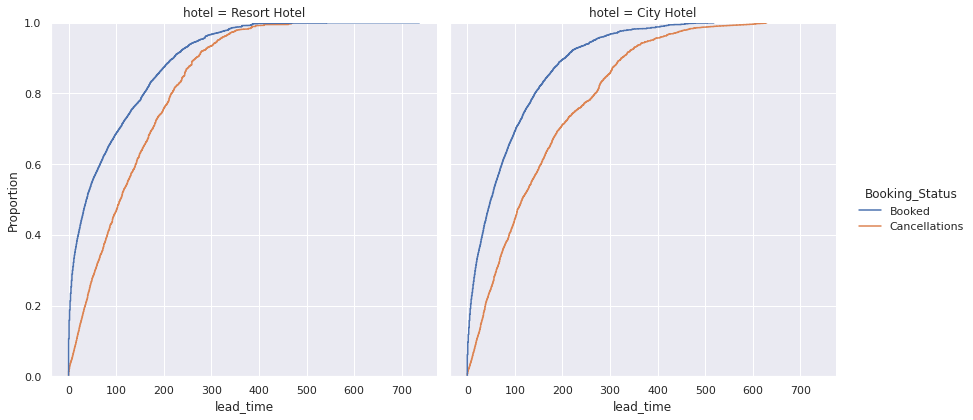

In [ ]:
 sns.set(font_scale=1)

sns.displot(
    df_new, x="lead_time", col="hotel", hue="Booking_Status",
     height=6, kind="ecdf")

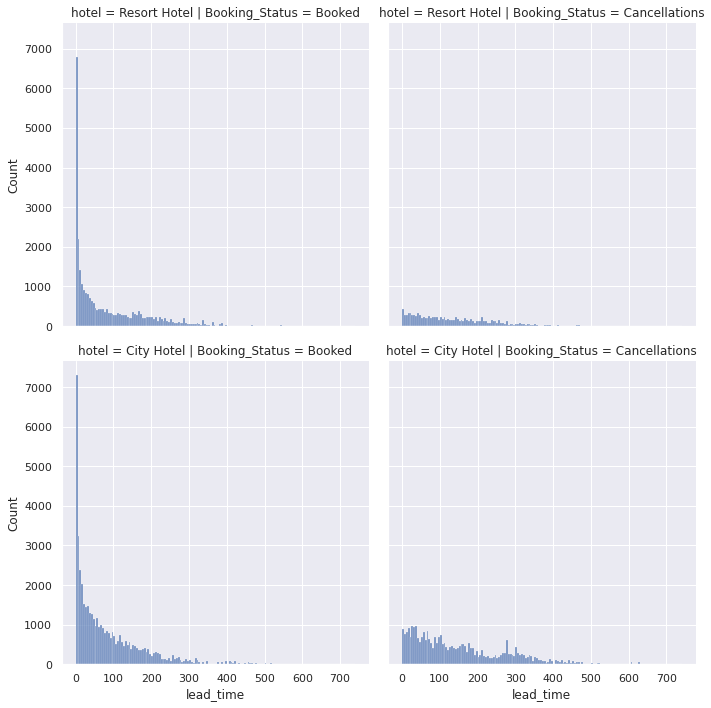

In [ ]:
# Plotting the Variables lead_time and Booking_status on the sns histogram to see the majority of concerntration of cancellations in both the hotels

sns.set(font_scale=1)

sns.displot(
    df_new, x="lead_time", col="Booking_Status", row="hotel",
    binwidth=5, height=5, kind="ecdf")